In [1]:
from Bio import SeqIO
from matplotlib import pyplot as plt
from IPython.display import Image

In [2]:
R1 = '/media/data/NGS_HW/frag.R1.fastq'
R2 = '/media/data/NGS_HW/frag.R2.fastq'

In [3]:
def gc_cont(path):
    GC_tot = 0
    Total = 0
    GC_per_read = []
    GC_per_read_round = []
    read_len = len(next(SeqIO.parse(path, 'fastq-illumina')).seq)
    N_reads = 0

    for record in SeqIO.parse(path, 'fastq-illumina'):
        seq = str(record.seq)
        GC_cur = 0
        high_q = 0
            
        for base in range(read_len):
            if record.letter_annotations['phred_quality'][base] >= 20: # учитываются только нуклеотиды с q_score >= 20
                high_q += 1
                if seq[base] == 'G' or seq[base] == 'C':
                    GC_cur += 1
        if high_q > read_len * 0.5: # учитываются риды, в которых больше половины нуклеотидов имеют q_score >= 20
            N_reads += 1
            GC_tot += GC_cur
            Total += high_q
            GC_per_read.append(round(GC_cur/high_q, 2))
                
    x = [i/100 for i in range(101)]
    y = [0 for i in range(101)]
    
    for gc_cont in GC_per_read:
        y[x.index(gc_cont)] += 1 
        
    plt.figure(figsize=(15, 10))
    plt.title("GC content")
    plt.show(plt.scatter(x, y))
    print('MEAN GC CONT = ', GC_tot/Total)

In [4]:
def dist_error(path):
    
    read_len = len(next(SeqIO.parse(path, 'fastq-illumina')).seq)
    N_reads = 0
    
    x = [i+1 for i in range(read_len)]
    y_1 = [0 for i in range(read_len)]
    y_2 = [0 for i in range(read_len)]
    
    
    for record in SeqIO.parse(path, 'fastq-illumina'):
        N_reads += 1
        for base in range(read_len):
            y_1[x.index(base+1)] += record.letter_annotations['phred_quality'][base]
            y_2[x.index(base+1)] += 10**(record.letter_annotations['phred_quality'][base]/(-10))
    
    for i in range(len(y_1)):
        y_1[i] = y_1[i] / N_reads
        y_2[i] = y_2[i] / N_reads
        
    plt.figure(figsize=(15, 10))
    plt.title("Q-score across across all bases")
    plt.show(plt.scatter(x, y_1))
    plt.figure(figsize=(15, 10))
    plt.title("Probability error across all bases")
    plt.show(plt.scatter(x, y_2))

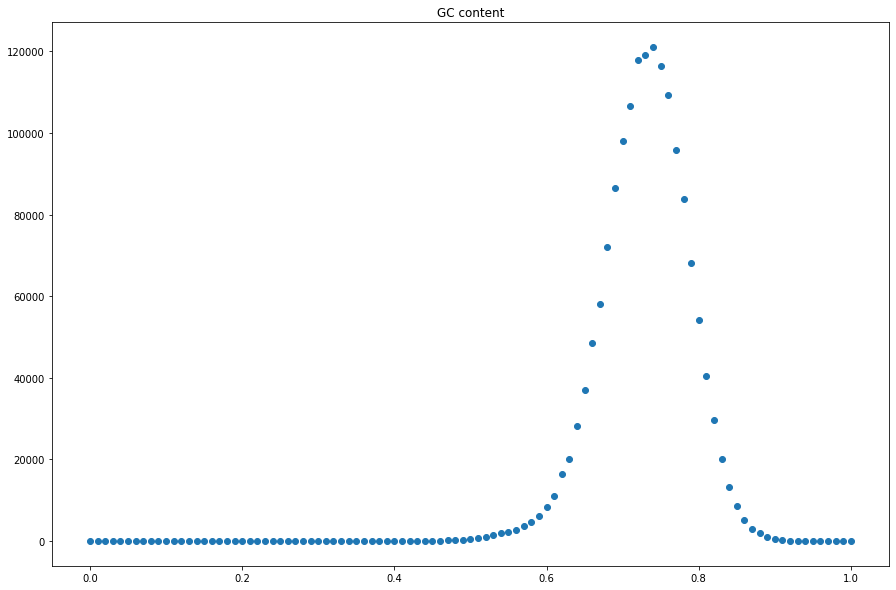

MEAN GC CONT =  0.727837121833383


In [5]:
gc_cont(R1)

### Полученное значение хорошо согласуется с данными fastqc

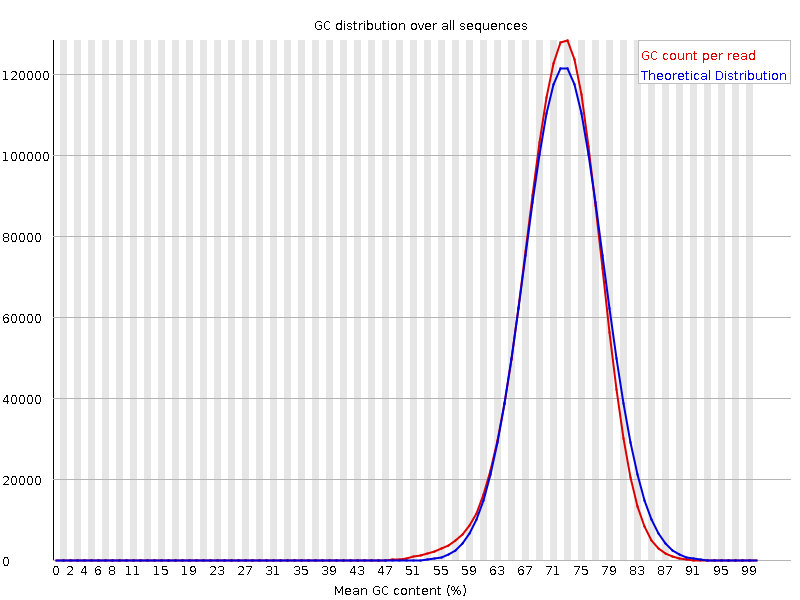

In [6]:
Image('/media/data/NGS_HW/NGS_HW1_2.png')

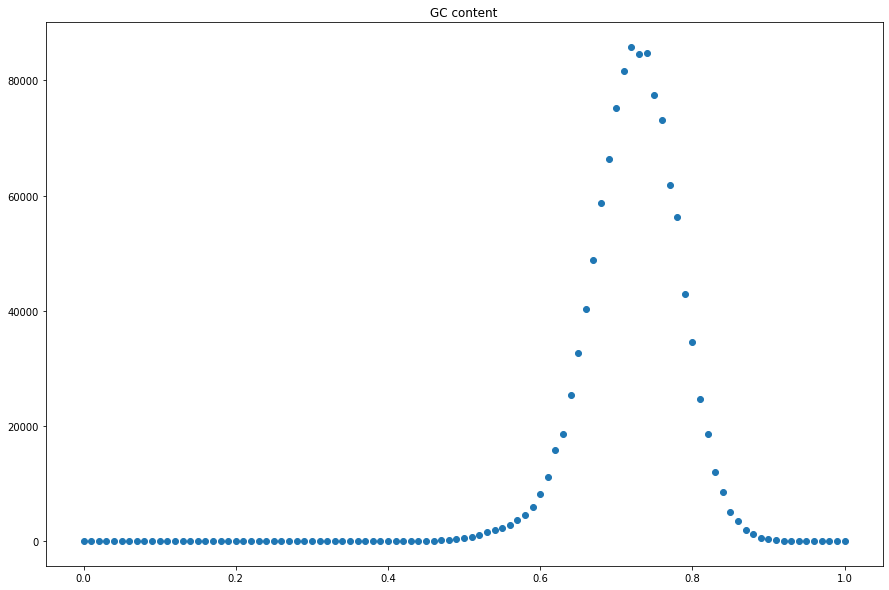

MEAN GC CONT =  0.7208594944628065


In [7]:
gc_cont(R2)

### Полученное значение хорошо согласуется с данными fastqc

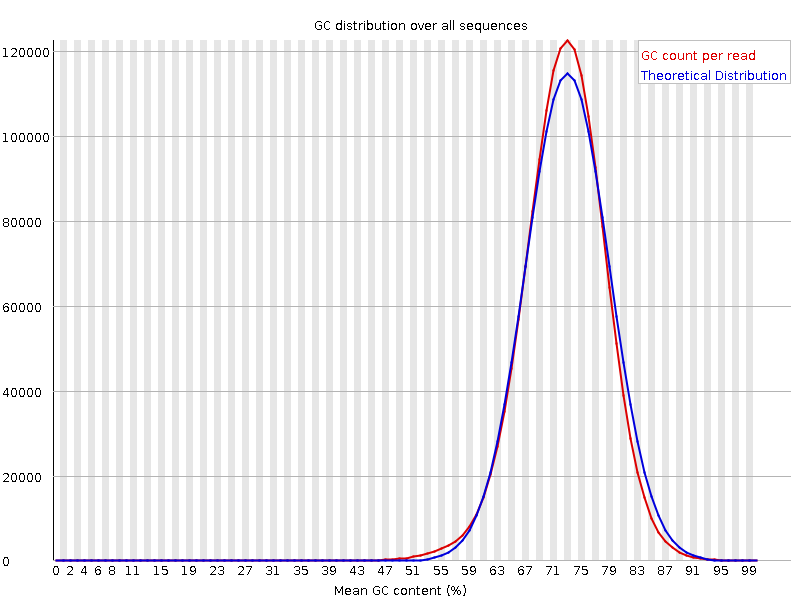

In [8]:
Image('/media/data/NGS_HW/NGS_HW1_4.png')

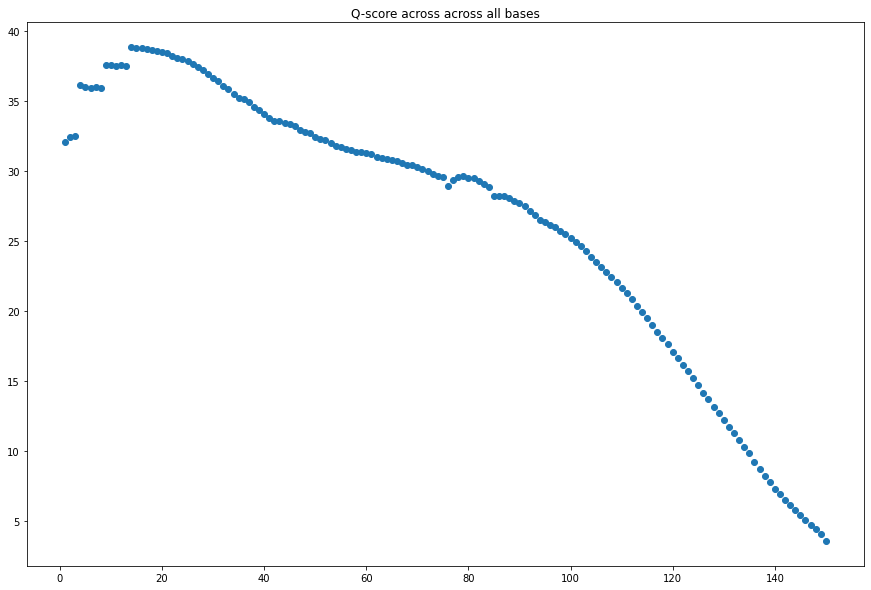

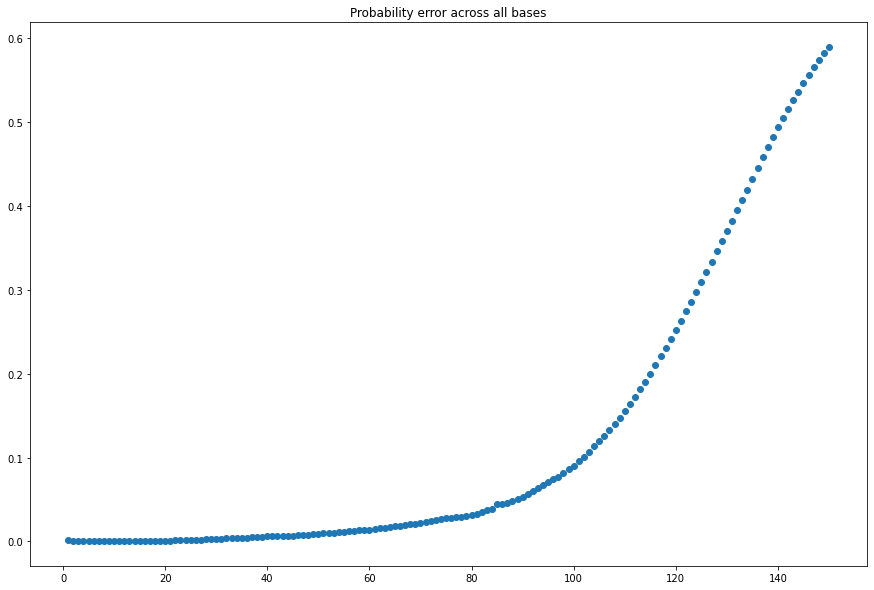

In [9]:
dist_error(R1)

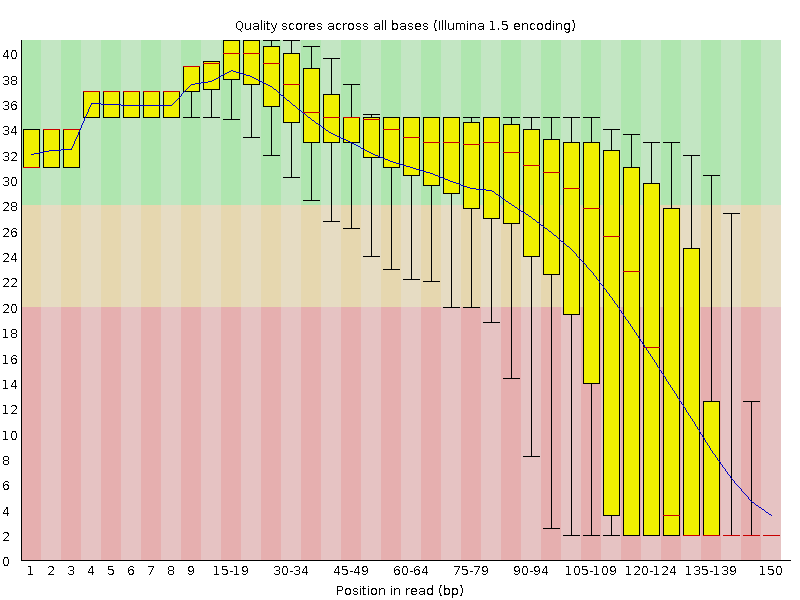

In [10]:
Image('/media/data/NGS_HW/NGS_HW1_1.png')

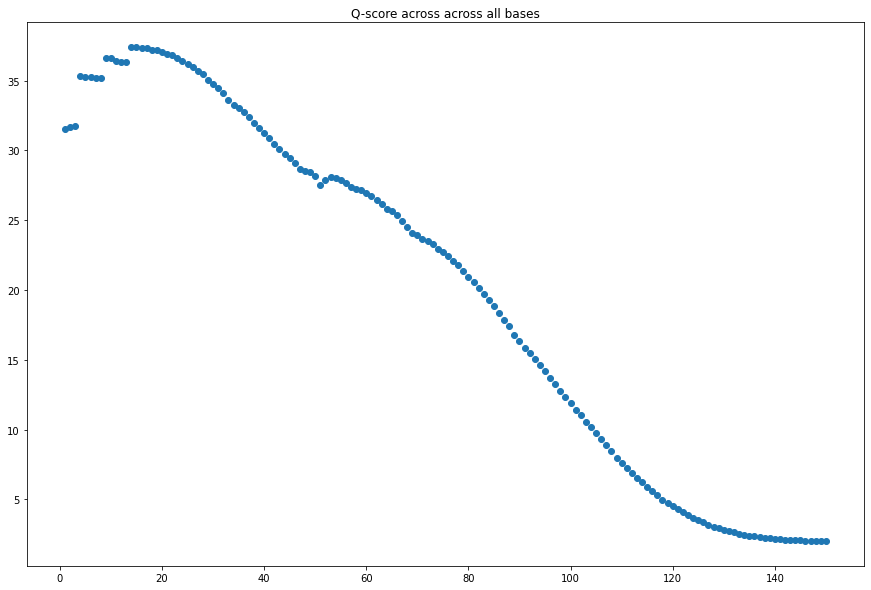

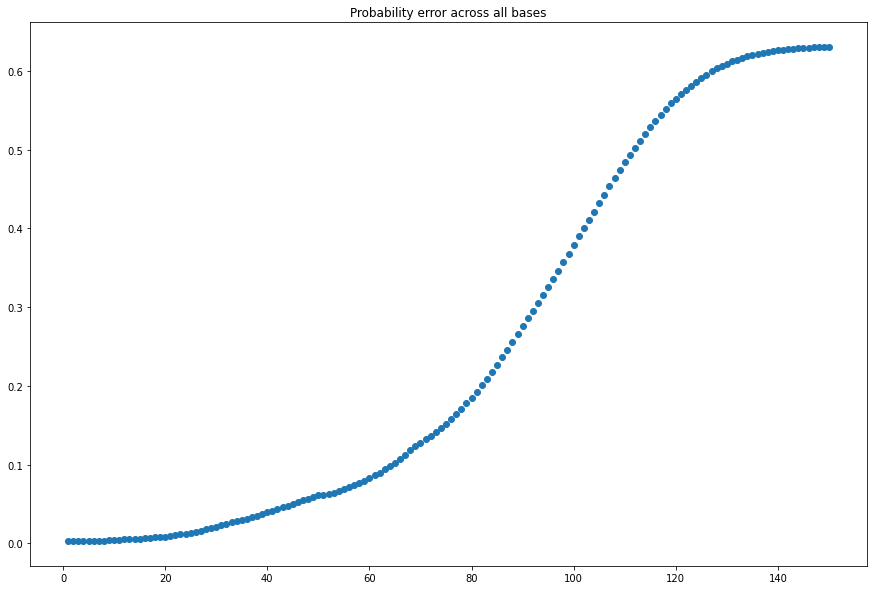

In [11]:
dist_error(R2)

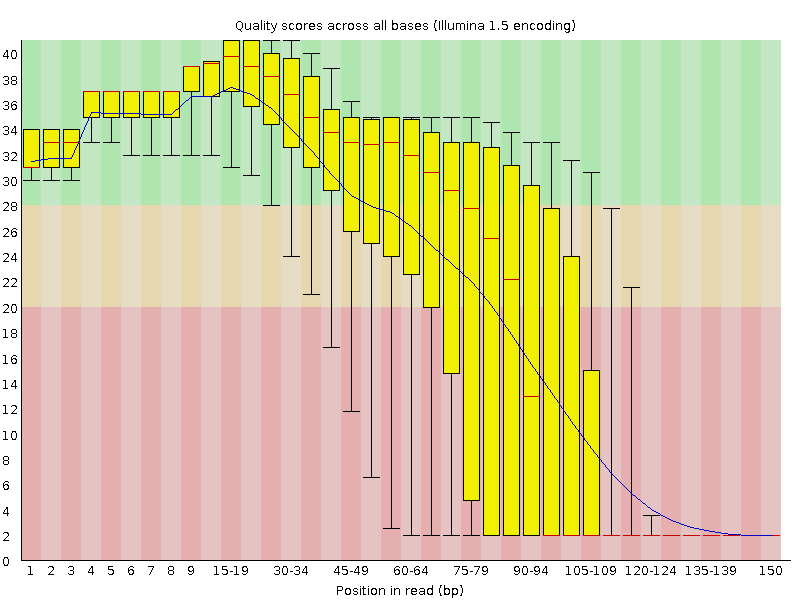

In [12]:
Image('/media/data/NGS_HW/NGS_HW1_3.png')